In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [73]:
import pandas as pd
import numpy as np

In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
df_clean = df

In [186]:
df_clean = df_clean.set_index('hn')

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
df_clean = df_clean.drop('hiv',1)
df_clean = df_clean.drop('size',1)
df_clean = df_clean.drop('utmet',1)
df_clean = df_clean.drop('vgmet',1)
df_clean = df_clean.drop('surgery',1)
df_clean = df_clean.drop('pchemo',1)
df_clean.columns

Index(['hn', 'age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [188]:
df_clean.isnull().any()


hn            False
age           False
parity        False
menopaus       True
disease       False
conization     True
OPDsize        True
appearance     True
stage          True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
vgmargin       True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

แสดงหมวดคอลัมชุดข้อมูลที่มีข้อมูลหาย

In [189]:
df_clean.isnull().sum()

hn              0
age             0
parity          0
menopaus        1
disease         0
conization      5
OPDsize        17
appearance    101
stage          24
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
vgmargin       96
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

คัดคอลัมที่ข้อมูลหายมากกว่า 5% ยกเว้น pmmet

In [174]:
df_clean = df_clean.drop('appearance',1)
df_clean = df_clean.drop('Wardsize',1)
df_clean = df_clean.drop('RHlvsi',1)
df_clean = df_clean.drop('depth',1)
df_clean = df_clean.drop('vgmargin',1)

In [190]:
df_clean.isnull().sum()

hn              0
age             0
parity          0
menopaus        1
disease         0
conization      5
OPDsize        17
appearance    101
stage          24
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
vgmargin       96
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

จัดกลุ่มอายุ มากกว่า 20 = OLd น้อยกว่า = Young

In [191]:
df_clean['age'] = np.where(df_clean['age']>20, 'Old', 'Young')
df_clean

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
0,2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2,2634477,Old,2,0.0,0,0.0,5.0,NaN,5.0,5.0,4.0,35.0,6.0,3.0,0.0,0.0,0.0,0.0
3,2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
4,2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0
1719,3167041,Old,1,0.0,0,1.0,0.0,5.0,2.0,0.0,5.0,20.0,0.0,NaN,0.0,0.0,0.0,2.0
1720,2623351,Old,2,0.0,0,1.0,0.0,5.0,1.0,0.0,1.0,13.0,NaN,NaN,0.0,0.0,0.0,0.0
1721,3302539,Old,3,0.0,0,1.0,0.0,5.0,4.0,0.0,2.0,15.0,NaN,NaN,0.0,0.0,0.0,0.0


แสดงค่า unique ของ pmmet

In [103]:
df_clean['pmmet'].unique()

array([ 0.,  1., nan])

* สุ่มตัวอย่าง 10 คนจากกลุ่ม pmmet = 0

In [178]:
pmmet_0 = df_clean[(df_clean['pmmet'] == 0.0)].sample(10)
pmmet_0

,hn,age,parity,menopaus,disease,conization,OPDsize,stage,finalhisto,nodeyiel,pelvicme,pmmet,adnmet
459,2834947,Old,1,0.0,0,0.0,3.0,4.0,1.0,20.0,0.0,0.0,0.0
284,2755250,Old,1,0.0,0,0.0,1.5,4.0,2.0,19.0,0.0,0.0,2.0
1307,3448075,Old,1,0.0,0,NaN,0.0,4.0,1.0,25.0,0.0,0.0,2.0
728,3059211,Old,2,0.0,0,0.0,3.0,4.0,1.0,26.0,0.0,0.0,0.0
1186,3374124,Old,0,0.0,0,0.0,3.5,4.0,2.0,25.0,0.0,0.0,0.0
260,2745289,Old,2,0.0,0,0.0,2.0,4.0,1.0,17.0,0.0,0.0,2.0
610,2924048,Old,2,0.0,0,0.0,0.0,4.0,1.0,33.0,0.0,0.0,0.0
2,2634477,Old,2,0.0,0,0.0,5.0,5.0,4.0,35.0,0.0,0.0,0.0
1124,3329241,Old,2,0.0,1,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0
302,2752133,Old,2,0.0,0,1.0,0.0,3.0,NaN,19.0,0.0,0.0,2.0


* สุ่มตัวอย่าง 10 คนจากกลุ่ม pmmet = 1

In [179]:
pmmet_1 = df_clean[(df_clean['pmmet'] == 1.0)].sample(10)
pmmet_1

,hn,age,parity,menopaus,disease,conization,OPDsize,stage,finalhisto,nodeyiel,pelvicme,pmmet,adnmet
1384,2846784,Old,1,0.0,0,0.0,2.0,4.0,1.0,22.0,1.0,1.0,0.0
1393,2446015,Old,2,0.0,1,0.0,5.0,5.0,1.0,13.0,1.0,1.0,0.0
795,3082211,Old,2,0.0,0,0.0,7.0,5.0,3.0,20.0,1.0,1.0,0.0
191,2715990,Old,4,0.0,0,0.0,2.0,4.0,1.0,24.0,0.0,1.0,2.0
1370,3511261,Old,3,1.0,0,0.0,3.0,4.0,1.0,33.0,1.0,1.0,0.0
279,2645018,Old,2,1.0,0,0.0,2.0,6.0,1.0,35.0,1.0,1.0,0.0
1435,3563913,Old,0,0.0,0,0.0,3.0,4.0,1.0,27.0,1.0,1.0,0.0
1171,3363841,Old,1,0.0,1,0.0,4.5,5.0,4.0,24.0,1.0,1.0,0.0
1662,2660881,Old,1,0.0,0,0.0,5.0,5.0,3.0,23.0,1.0,1.0,0.0
1494,2086235,Old,2,1.0,1,1.0,0.0,4.0,1.0,26.0,0.0,1.0,0.0


เตรียม data present

In [165]:
import matplotlib.pyplot as plt

In [192]:
ps_clean = df_clean
ps_clean

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
0,2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2,2634477,Old,2,0.0,0,0.0,5.0,NaN,5.0,5.0,4.0,35.0,6.0,3.0,0.0,0.0,0.0,0.0
3,2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
4,2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0
1719,3167041,Old,1,0.0,0,1.0,0.0,5.0,2.0,0.0,5.0,20.0,0.0,NaN,0.0,0.0,0.0,2.0
1720,2623351,Old,2,0.0,0,1.0,0.0,5.0,1.0,0.0,1.0,13.0,NaN,NaN,0.0,0.0,0.0,0.0
1721,3302539,Old,3,0.0,0,1.0,0.0,5.0,4.0,0.0,2.0,15.0,NaN,NaN,0.0,0.0,0.0,0.0


แสดงจำนวนผู้ป่วยที่มีโรค

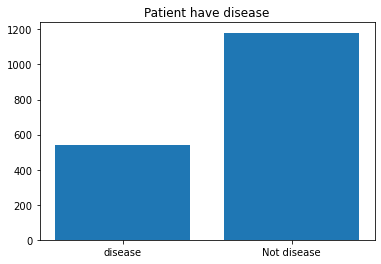

In [194]:
ps_clean['disease'] = np.where(ps_clean['disease'] == 1.0 ,"Yes","No")

total = ps_clean.shape
explode = (0,0.1)
labels = ('disease','Not disease')
plt.title('Patient have disease')
plt.bar(labels,[sum(ps_clean['disease'] == 'Yes'),sum(ps_clean['disease'] == 'No')])
plt.show()

จำนวนผู้ป่วยตามกลุ่ม pmmet

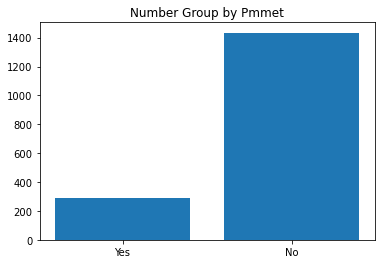

In [204]:
ps_clean['pmmet'] = np.where(ps_clean['pmmet'] == 1.0 ,"Yes","No")

total = ps_clean.shape
explode = (0,0.1)
labels = ('Yes','No')
plt.title('Number Group by Pmmet')
plt.bar(labels,[sum(ps_clean['pmmet'] == 'Yes'),sum(ps_clean['pmmet'] == 'No')])
plt.show()

อัตราส่วนที่ต้องรับการผ่าตัด

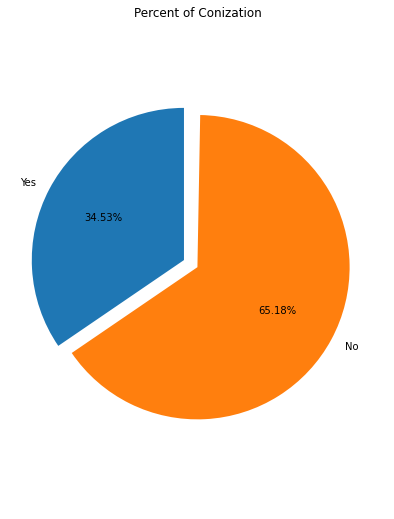

In [136]:
pt = np.shape(ps_clean)
fig = plt.figure(1, figsize=(15,9))
labels = ['Yes' , 'No']
perc = [sum(ps_clean['conization'] == 1)/pt[0],
       sum(ps_clean['conization'] == 0)/pt[0]
       ]

explode = (0.1 , 0) 
plt.subplot(1,2,1)
plt.title('Percent of Conization')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', 
        startangle=90, explode=explode)

plt.show()

อัตราส่วนของวัยทอง

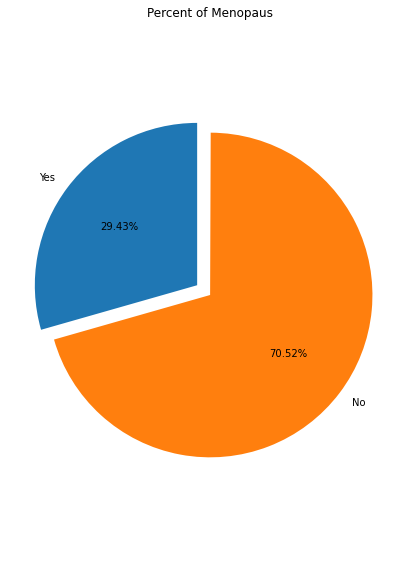

In [201]:

fig = plt.figure(1, figsize=(16,10))
labels = ['Yes' , 'No']
perc = [sum(ps_clean['menopaus'] == 1)/pt[0],
       sum(ps_clean['menopaus'] == 0)/pt[0]
       ]

explode = (0.1 , 0) 
plt.subplot(1,2,1)
plt.title('Percent of Menopaus')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', 
        startangle=90, explode=explode)

plt.show()

อัตราส่วนผู้ป่วยขั้นต่างๆ 1-6

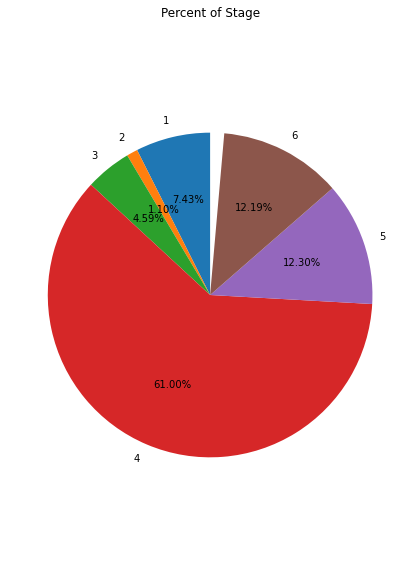

In [206]:

fig = plt.figure(1, figsize=(16,10))
labels ='1','2','3','4','5','6'
perc = [sum(ps_clean['stage'] == 1)/pt[0],
        sum(ps_clean['stage'] == 2)/pt[0],
        sum(ps_clean['stage'] == 3)/pt[0],
        sum(ps_clean['stage'] == 4)/pt[0],
        sum(ps_clean['stage'] == 5)/pt[0],
       sum(ps_clean['stage'] == 6)/pt[0]
       ]

explode = (0 , 0,0,0,0,0) 
plt.subplot(1,2,1)
plt.title('Percent of Stage')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', 
        startangle=90, explode=explode)

plt.show()